29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7860 - loss: 0.6225 - val_accuracy: 0.8430 - val_loss: 0.4453
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8633 - loss: 0.3834 - val_accuracy: 0.8535 - val_loss: 0.3963
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8746 - loss: 0.3440 - val_accuracy: 0.8659 - val_loss: 0.3750


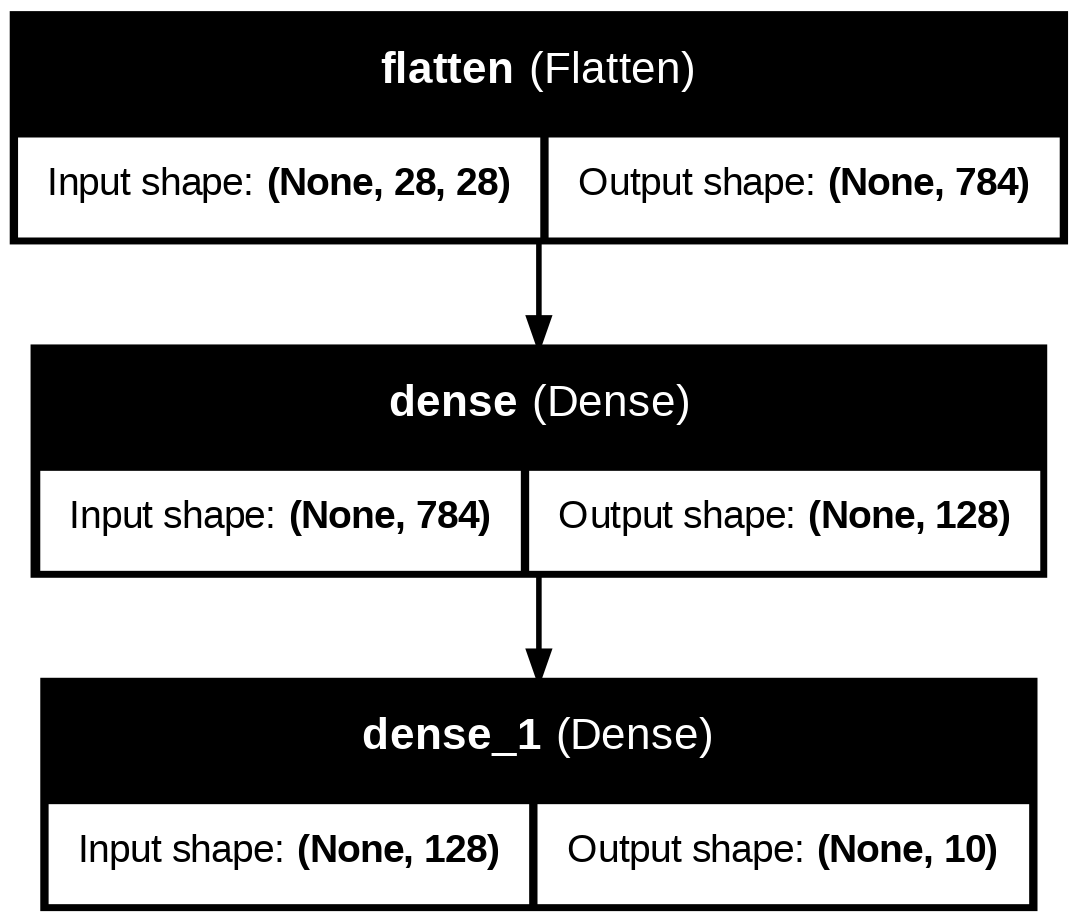

In [1]:
import tensorflow as tf
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7951 - loss: 0.5837 - val_accuracy: 0.8537 - val_loss: 0.4115
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8702 - loss: 0.3586 - val_accuracy: 0.8690 - val_loss: 0.3693
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8811 - loss: 0.3256 - val_accuracy: 0.8756 - val_loss: 0.3478


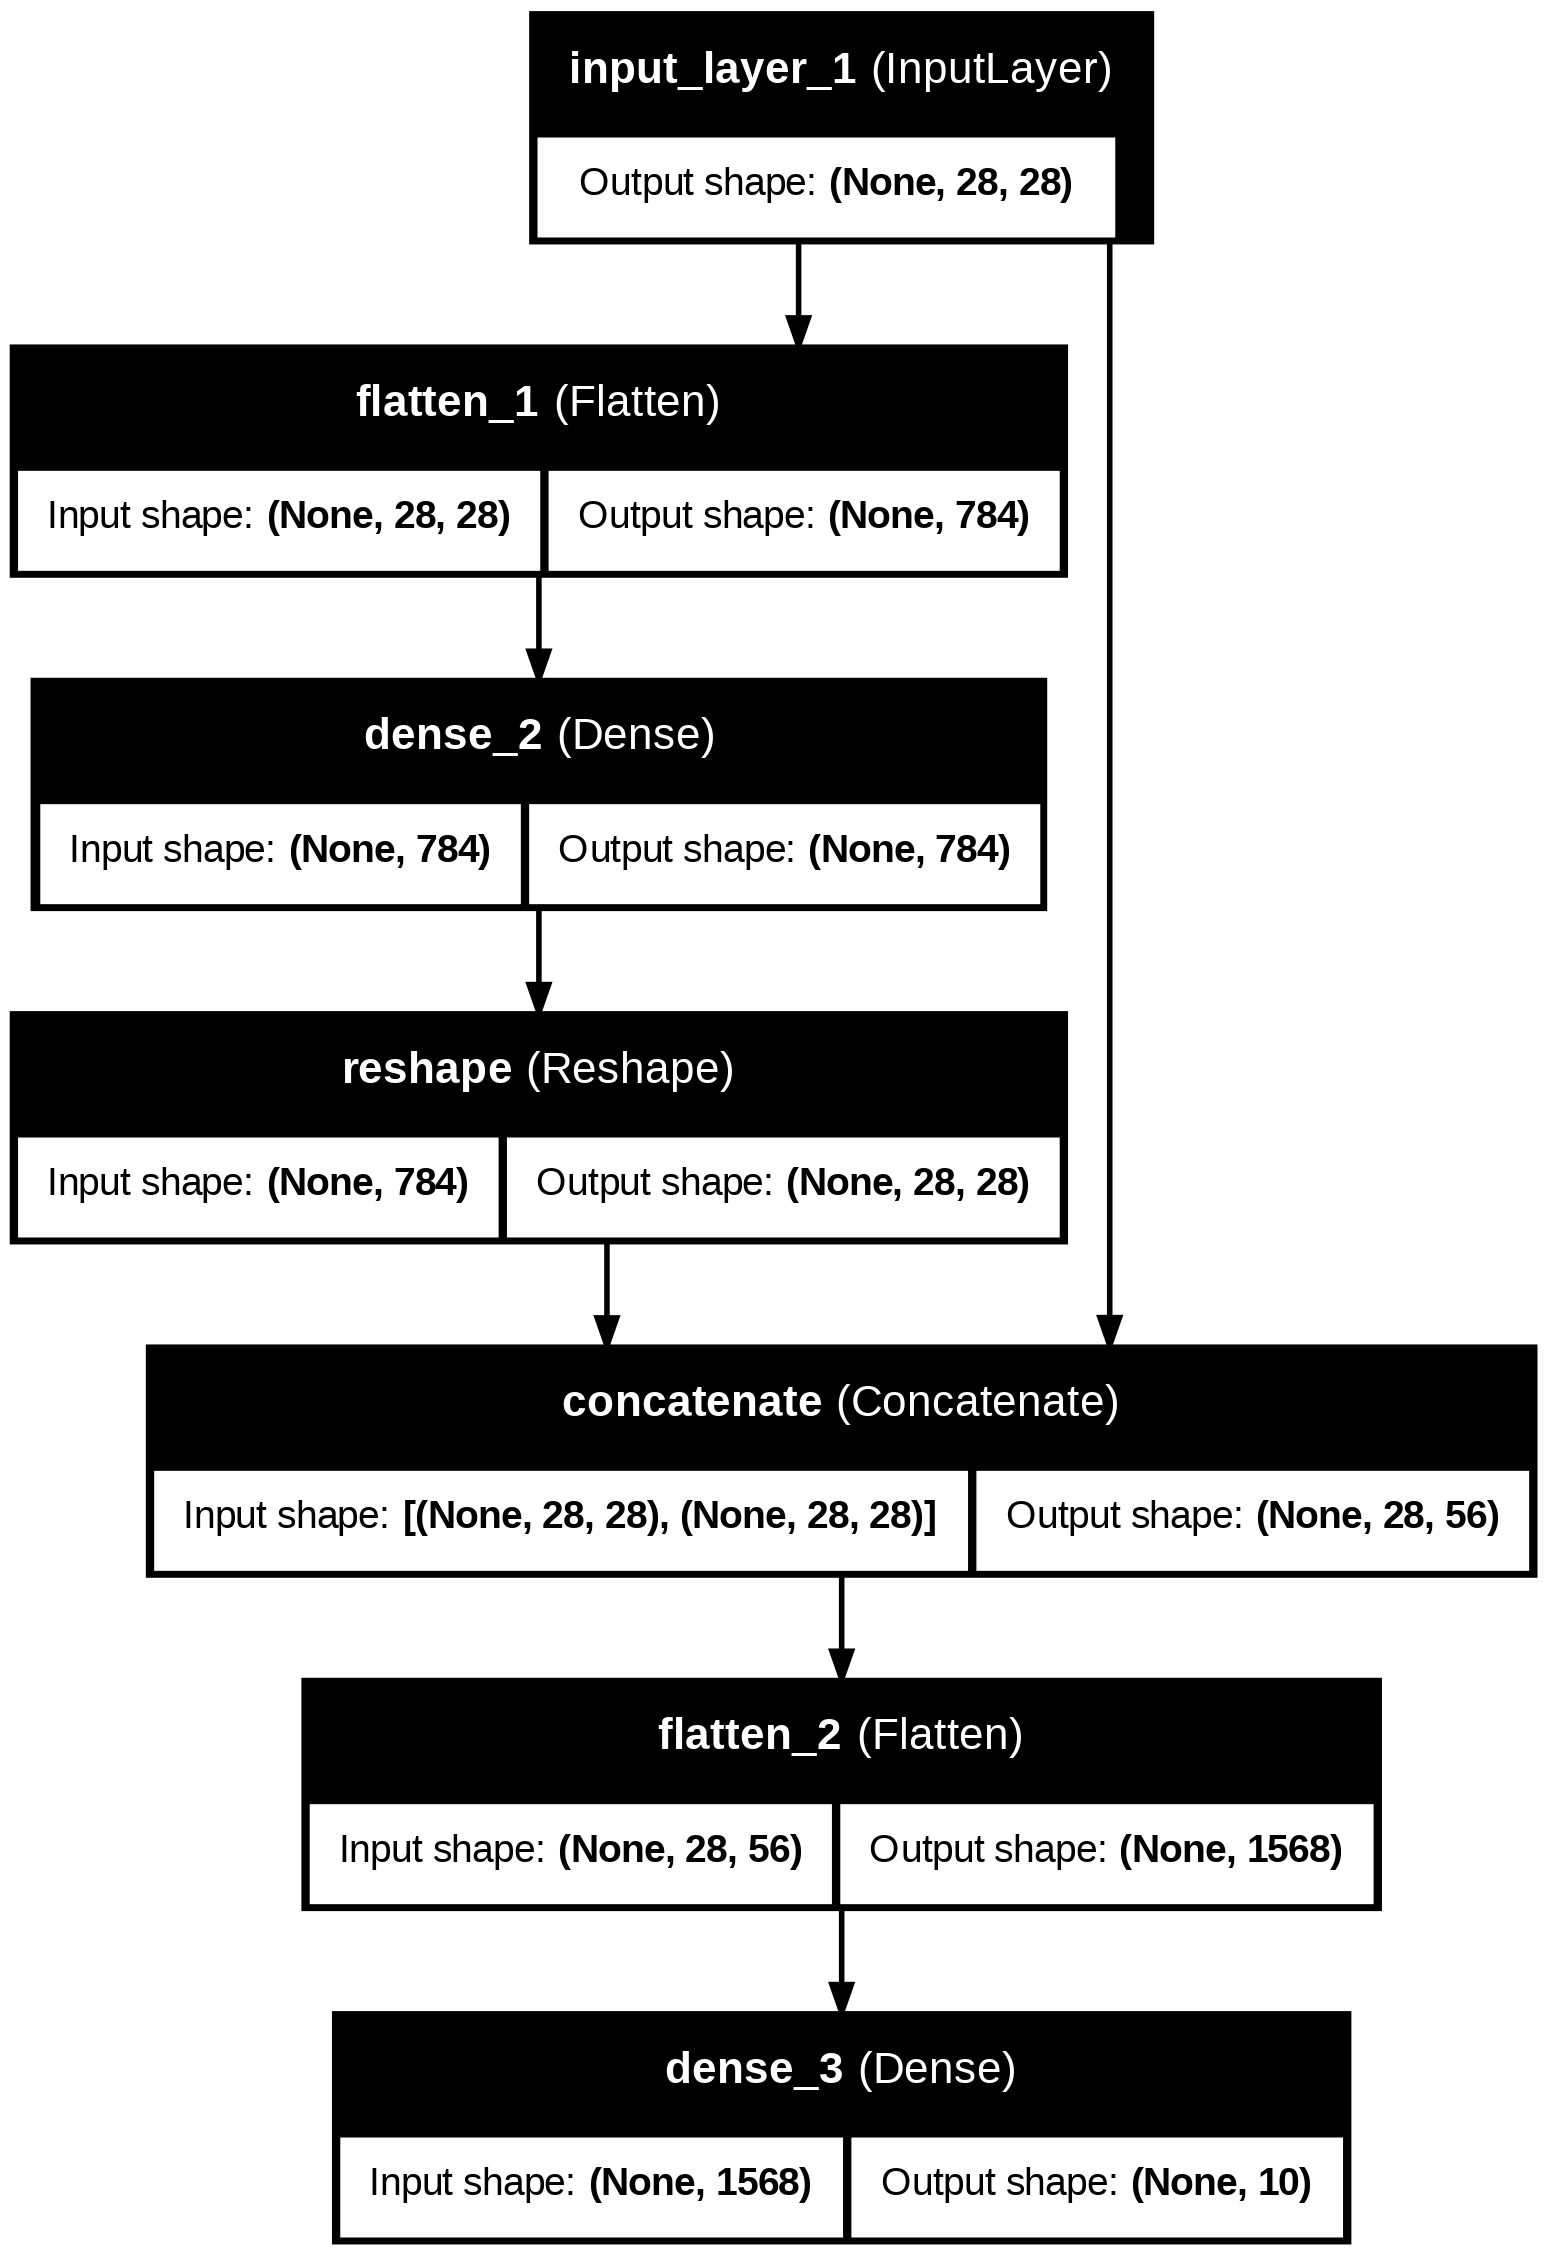

In [2]:
#이리저리 섞기
Input1 = tf.keras.layers.Input(shape=[28,28])
Flatten1 = tf.keras.layers.Flatten()(Input1)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(Flatten1)
reshape1 = tf.keras.layers.Reshape((28,28))(dense1)

conant1 = tf.keras.layers.Concatenate()([Input1, reshape1])
Flatten2 = tf.keras.layers.Flatten()(conant1)
output = tf.keras.layers.Dense(10, activation='softmax')(Flatten2)
#어디가 시작이고 끝인지 알려주기
model = tf.keras.Model(Input1, output)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)